#      ****     SENTIMENT ANALYSIS OF TWEETS       ****

In [2]:
import re
import csv
import string
import numpy as np
import pandas as pd
from time import time
from wordcloud import WordCloud 
from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline
from porter_stemmer import PorterStemmer
from sklearn.base import TransformerMixin
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction import stop_words
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS

### Data Reading

In [3]:
data = pd.read_csv("./input_data/final_data.csv")
data.head(10)

,text,target
0,awww bummer shoulda got david carr dai,0
1,upset updat facebook tex result school todai b...,0
2,dive time ball manag save rest bound,0
3,bodi feel itchi like,0
4,behav mad,0
5,crew,0
6,need hug,0
7,hei long time ye rain bit bit lol fine thank,0
8,nope did,0
9,que muera,0


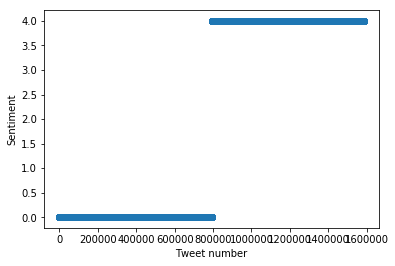

In [4]:
y = data['target']
x = range(len(data))
plt.scatter(x,y)
plt.xlabel("Tweet number")
plt.ylabel("Sentiment")
plt.plot()
plt.show()

### Train-Test-Validation Split

In [5]:
from sklearn.model_selection import train_test_split

X = data['text']
Y = data['target']
X_train, X_val_test , Y_train, Y_val_test = train_test_split(X,Y,test_size=0.02)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_test,Y_val_test,test_size=0.5)

In [6]:
train_df = pd.concat([X_train, Y_train],axis='columns').reset_index(drop=True)
train_df.to_csv("./input_data/train_df.csv", sep=',')         

validation_df = pd.concat([X_val, Y_val],axis='columns').reset_index(drop=True)
validation_df.to_csv("./input_data/validation_df.csv", sep=',')

test_df = pd.concat([X_test, Y_test],axis='columns').reset_index(drop=True)
test_df.to_csv("./input_data/test_df.csv", sep=',')

### Reading Of Data From Stored File

In [ ]:
train_df = pd.read_csv("./input_data/train_df.csv")
X_train = train_df['text']
Y_train = train_df['target']


val_df = pd.read_csv("./input_data/validation_df.csv")
X_val = val_df['text']
Y_val = val_df['target']

### Model objects

In [ ]:
cvec = CountVectorizer()
tfidf = TfidfVectorizer()
nb = GaussianNB()

In [ ]:
def model_results(vectorizer,X_train=X_train,X_val=X_val,Y_train=Y_train,Y_val=Y_val,ngram_range=(1,1),stop_words=None):
    for n in range(10000,100001,10000):
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        
        t0 = time()
        VC_train = vectorizer.fit_transform(X_train.values.astype('U'))
        VC_val = vectorizer.transform(X_val.values.astype('U'))
        
        nb = GaussianNB()
        i = 0
        while i < len(X_train):
            j = min(len(X_train),i+10000)
            model_nb = nb.partial_fit(VC_train[i:j].todense(), Y_train[i:j],classes=[0,4])
            i += 10000
        pred = model_nb.predict(VC_val.todense())
        
        train_test_time = time() - t0
        
        if len(X_val[Y_val == 0]) / (len(X_val)*1.) > 0.5:
            null_accuracy = len(X_val[Y_val == 0]) / (len(X_val)*1.)
        else:
            null_accuracy = 1. - (len(X_val[Y_val == 0]) / (len(X_val)*1.)) 
        accuracy = accuracy_score(Y_val,pred)
        
        print("Number of features : ",n)
        print("Train and test time:  {0:.2f}s".format(train_test_time))
        print("Null accuracy : {0:.2f}% ".format(null_accuracy*100))
        print("Model Accuracy : {0:.2f}%".format(accuracy*100))
        
        if accuracy > null_accuracy:
            print("Model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
        elif accuracy == null_accuracy:
            print("Model has the same accuracy with the null accuracy")
        else:
            print("Model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
            
        print("--------------------------------------------------------------------")

## Bag Of Words

### Unigram

In [ ]:
print("RESULTS WITH BAG OF WORDS UNIGRAM MODEL ")
print("--------------------------------------------------------------------")
model_results(cvec)

RESULTS WITH BAG OF WORDS UNIGRAM MODEL 
--------------------------------------------------------------------
Number of features :  10000
Train and test time:  378.47s
Null accuracy : 50.01% 
Model Accuracy : 68.43%
Model is 18.42% more accurate than null accuracy
--------------------------------------------------------------------
Number of features :  20000
Train and test time:  1262.72s
Null accuracy : 50.01% 
Model Accuracy : 68.78%
Model is 18.77% more accurate than null accuracy
--------------------------------------------------------------------
Number of features :  30000
Train and test time:  1943.07s
Null accuracy : 50.01% 
Model Accuracy : 61.27%
Model is 11.26% more accurate than null accuracy
--------------------------------------------------------------------
Number of features :  40000
Train and test time:  3833.17s
Null accuracy : 50.01% 
Model Accuracy : 58.89%
Model is 8.87% more accurate than null accuracy
-------------------------------------------------------------

### Bigram

In [ ]:
print("RESULTS WITH BAG OF WORDS BIGRAM MODEL ")
print("--------------------------------------------------------------------")
model_results(cvec,ngram_range=(2,2))

RESULTS WITH BAG OF WORDS BIGRAM MODEL 
--------------------------------------------------------------------
Number of features :  10000
Train and test time:  667.85s
Null accuracy : 50.32% 
Model Accuracy : 63.12%
Model is 12.80% more accurate than null accuracy
--------------------------------------------------------------------
Number of features :  20000
Train and test time:  1434.05s
Null accuracy : 50.32% 
Model Accuracy : 64.38%
Model is 14.06% more accurate than null accuracy
--------------------------------------------------------------------
Number of features :  30000
Train and test time:  2757.92s
Null accuracy : 50.32% 
Model Accuracy : 64.97%
Model is 14.65% more accurate than null accuracy
--------------------------------------------------------------------


## TF-IDF

### Unigram

In [ ]:
print("RESULTS WITH TF-IDF UNIGRAM MODEL ")
print("--------------------------------------------------------------------")
model_results(tfidf)

RESULTS WITH TF-IDF UNIGRAM MODEL 
--------------------------------------------------------------------
Number of features :  10000
Train and test time:  260.10s
Null accuracy : 50.27% 
Model Accuracy : 68.37%
Model is 18.10% more accurate than null accuracy
--------------------------------------------------------------------
Number of features :  20000
Train and test time:  539.84s
Null accuracy : 50.27% 
Model Accuracy : 66.11%
Model is 15.84% more accurate than null accuracy
--------------------------------------------------------------------
Number of features :  30000
Train and test time:  1167.30s
Null accuracy : 50.27% 
Model Accuracy : 61.77%
Model is 11.50% more accurate than null accuracy
--------------------------------------------------------------------


### Bigram

In [ ]:
print("RESULTS WITH TF-IDF BIGRAM MODEL ")
print("--------------------------------------------------------------------")
model_results(tfidf,ngram_range=(1,2))